In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Read the Excel file into pandas dataframes
df = pd.read_excel('output_data.xlsx')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Sales,Price,Cost,Product Footprint (kgsCo2),Profit
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,1873.42,84.55,22.1076,18.81,1851.3124
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,2696.52,114.40,90.4540,64.38,2606.0660
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,3521.76,19.80,10.6128,48.00,3511.1472
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,1794.90,76.68,30.3048,59.78,1764.5952
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,6626.56,35.88,19.6716,28.00,6606.8884


In [5]:
df.isnull().sum()

id                            0
gender                        0
masterCategory                0
subCategory                   0
articleType                   0
baseColour                    0
season                        0
year                          0
usage                         0
productDisplayName            0
Sales                         0
Price                         0
Cost                          0
Product Footprint (kgsCo2)    0
Profit                        0
dtype: int64

In [6]:
df.groupby("gender").agg({"Sales":"mean"})

,Sales
gender,
Boys,6975.511614
Girls,5362.032214
Men,5947.471966
Unisex,7730.379926
Women,5019.998840


In [7]:
#Sales Analysis
sales_analysis_df = pd.DataFrame({
    'Total Sales': [df['Sales'].sum()],
    'Average Sales': [df['Sales'].mean()],
    'Max Sales': [df['Sales'].max()],
    'Min Sales': [df['Sales'].min()]
})
sales_analysis_df

,Total Sales,Average Sales,Max Sales,Min Sales
0,2.513887e+08,5656.047393,14811.0,85.2


In [8]:
# Carbon Footprint Analysis
carbon_analysis_df = pd.DataFrame({
    'Total Carbon Footprint': [df['Product Footprint (kgsCo2)'].sum()],
    'Average Carbon Footprint': [df['Product Footprint (kgsCo2)'].mean()],
    'Carbon Footprint per Sale': [df['Product Footprint (kgsCo2)'].sum() / len(df)]
})
carbon_analysis_df

,Total Carbon Footprint,Average Carbon Footprint,Carbon Footprint per Sale
0,1.600448e+06,36.00882,36.00882


In [9]:
# Gender-based Analysis
gender_analysis_df = pd.DataFrame({
    'Sales by Gender': df.groupby('gender')['Sales'].sum(),
    'Profit by Gender': (df.groupby('gender')['Sales'].sum() - df.groupby('gender')['Cost'].sum())
})
gender_analysis_df

,Sales by Gender,Profit by Gender
gender,,
Boys,5.789675e+06,5.771231e+06
Girls,3.512131e+06,3.492831e+06
Men,1.318257e+08,1.312096e+08
Unisex,1.672854e+07,1.665424e+07
Women,9.353262e+07,9.300273e+07


In [12]:
# Product Category Analysis
category_analysis_df = pd.DataFrame({
    'Sales by Master Category': df.groupby('masterCategory')['Sales'].sum(),
    'Sales by SubCategory': (df.groupby('subCategory')['Sales'].sum())
})
category_analysis_df

,Sales by Master Category,Sales by SubCategory
Accessories,6.824238e+07,1478285.13
Apparel,1.165545e+08,NaN
Apparel Set,NaN,348036.18
Bags,NaN,21591284.45
Bath and Body,NaN,59161.47
Beauty Accessories,NaN,9182.37
Belts,NaN,9099960.88
Bottomwear,NaN,14342338.11
Cufflinks,NaN,1199743.62
Dress,NaN,3194458.16


In [15]:
# Seasonal Analysis
seasonal_analysis_df = pd.DataFrame({
    'Sales by Season': df.groupby('season')['Sales'].sum()
})
seasonal_analysis_df

,Sales by Season
season,
Fall,6.399773e+07
Spring,1.609849e+07
Summer,1.263709e+08
Winter,4.492160e+07


In [17]:
# Yearly Analysis
yearly_analysis_df = pd.DataFrame({
    'Sales by Year': df.groupby('year')['Sales'].sum(),
})
yearly_analysis_df

,Sales by Year
year,
2007.00000,10577.86
2008.00000,44601.43
2009.00000,110931.19
2010.00000,5603182.10
2011.00000,78778639.94
2012.00000,92720965.28
2012.80594,10146.92
2013.00000,8331373.87
2014.00000,975465.15


In [24]:
#Average footprint by gender
average_footprint_by_gender_df = df.groupby('gender')['Product Footprint (kgsCo2)'].mean().reset_index()
average_footprint_by_gender_df.columns = ['Gender', 'Average Footprint']
average_footprint_by_gender_df.sort_values(
    by="Average Footprint",
    ascending=False
) 

,Gender,Average Footprint
1,Girls,42.000055
4,Women,38.798268
3,Unisex,37.176826
2,Men,33.624343
0,Boys,29.294477


In [22]:
#Average footprint by master category
average_footprint_by_master_category_df = df.groupby('masterCategory')['Product Footprint (kgsCo2)'].mean().reset_index()
average_footprint_by_master_category_df.columns = ['Master Category', 'Average Footprint']
average_footprint_by_master_category_df.sort_values(
    by="Average Footprint",
    ascending=False
)

,Master Category,Average Footprint
4,Home,73.710000
3,Free Items,52.331344
0,Accessories,44.939913
5,Personal Care,39.968805
6,Sporting Goods,38.023200
2,Footwear,35.267681
1,Apparel,31.087789


In [27]:
#Count of Customers by Gender
customer_count_by_gender_df = df['gender'].value_counts().reset_index()
customer_count_by_gender_df.columns = ['Gender', 'Customer Count']
customer_count_by_gender_df.sort_values(by="Customer Count", ascending=False)

,Gender,Customer Count
0,Men,22165
1,Women,18632
2,Unisex,2164
3,Boys,830
4,Girls,655


In [30]:
#Average Sales by Gender
average_sales_by_gender_df = df.groupby('gender')['Sales'].mean().reset_index()
average_sales_by_gender_df.columns = ['Gender', 'Average Sales']
average_sales_by_gender_df.sort_values(by="Average Sales", ascending=False)

,Gender,Average Sales
3,Unisex,7730.379926
0,Boys,6975.511614
2,Men,5947.471966
1,Girls,5362.032214
4,Women,5019.998840


In [ ]:
# Calculate Profit and a column named "profit"
# merged_df['Profit'] = merged_df['Sales'] - merged_df['Cost']

In [ ]:
# Total Profit by Gender
#total_profit_by_gender_df = df.groupby('gender')['Profit'].sum().reset_index()
#total_profit_by_gender_df.columns = ['Gender', 'Total Profit']
#total_profit_by_gender_df.sort_values(by="Total Profit", ascending=False)

In [31]:
#Average Sales by Season
average_sales_by_season_df = df.groupby('season')['Sales'].mean().reset_index()
average_sales_by_season_df.columns = ['Season', 'Average Sales']
average_sales_by_season_df.sort_values(by="Average Sales", ascending=False)

,Season,Average Sales
2,Summer,5878.534691
0,Fall,5591.763221
1,Spring,5393.129146
3,Winter,5273.107359


In [32]:
#Seasonal Distribution of Product Categories
product_category_distribution_by_season_df = df.groupby(['season', 'masterCategory'])['id'].count().reset_index()
product_category_distribution_by_season_df.columns = ['Season', 'masterCategory', 'Product Count']
product_category_distribution_by_season_df.sort_values(by="Product Count", ascending=False)

,Season,masterCategory,Product Count
11,Summer,Apparel,12669
1,Fall,Apparel,7722
16,Winter,Accessories,5381
10,Summer,Accessories,4568
12,Summer,Footwear,4167
2,Fall,Footwear,2480
9,Spring,Personal Care,2366
18,Winter,Footwear,2208
0,Fall,Accessories,1231
17,Winter,Apparel,871


<Axes: xlabel='gender', ylabel='Count'>

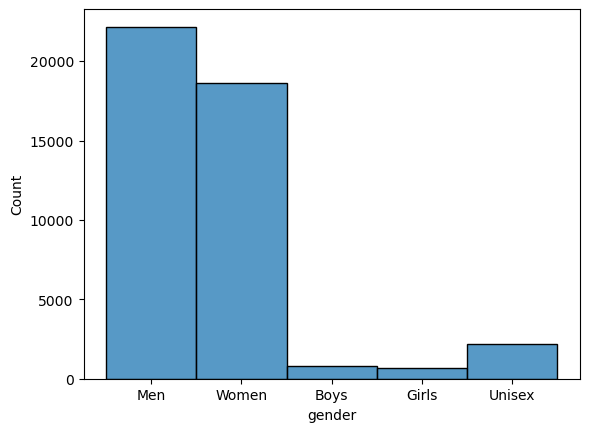

In [33]:
import seaborn as sns

# Create a histogram
sns.histplot(data=df, x='gender')

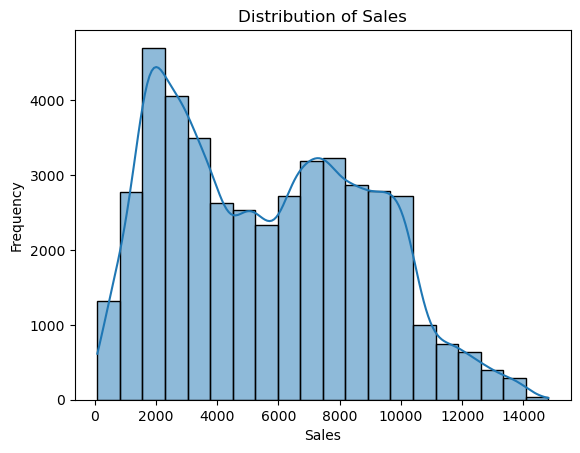

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt  # Add this line to import matplotlib.pyplot

# Sales Analysis with Seaborn
# Create a histogram of sales

sns.histplot(data=df, x='Sales', bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [ ]:
# Profit Analysis with Seaborn
#sns.boxplot(data=merged_df_filled, y='Profit')
#plt.ylabel('Profit')
#plt.title('Distribution of Profit')
#plt.show()

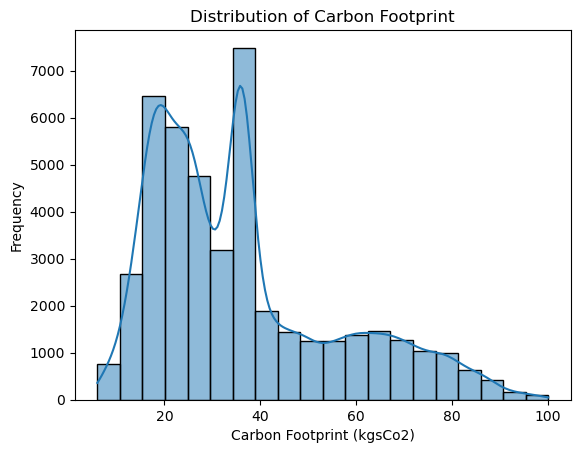

In [36]:
# Carbon Footprint Analysis with Seaborn
sns.histplot(data=df, x='Product Footprint (kgsCo2)', bins=20, kde=True)
plt.xlabel('Carbon Footprint (kgsCo2)')
plt.ylabel('Frequency')
plt.title('Distribution of Carbon Footprint')
plt.show()

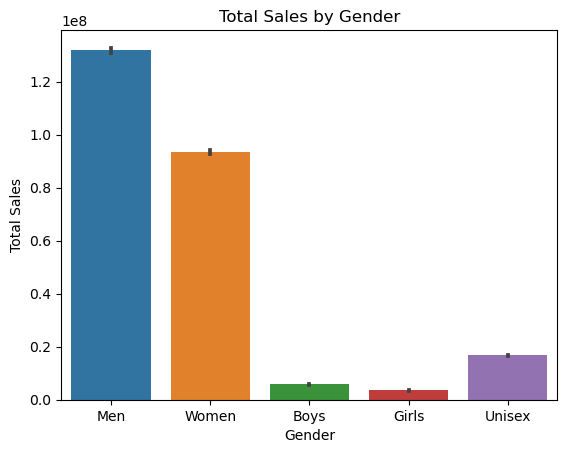

In [37]:
# Sales by Gender with Seaborn
sns.barplot(data=df, x='gender', y='Sales', estimator=sum)
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender')
plt.show()

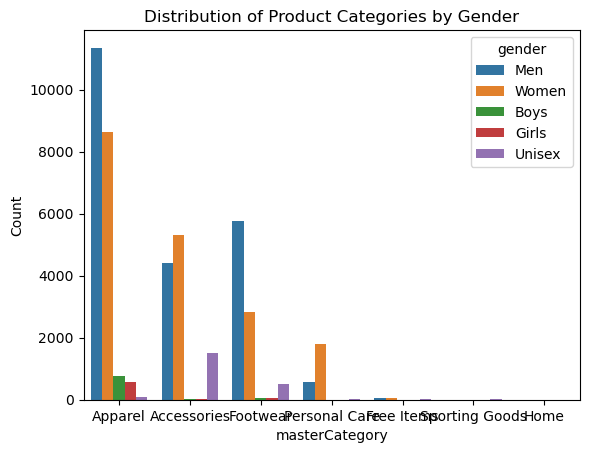

In [38]:
# Product Category Analysis with Seaborn
# Count plot of product categories
sns.countplot(data=df, x='masterCategory', hue='gender')
plt.xlabel('masterCategory')
plt.ylabel('Count')
plt.title('Distribution of Product Categories by Gender')
plt.show()

In [41]:
#Mevsim ve cinsiyete göre satışların ortalaması, sayısı ve özeti
df.groupby(["gender", "season"]).agg({"Sales": ["sum", "count", "mean"]}).sort_values(by=("Sales", "sum"), ascending=False)

Sales                    
                       sum  count         mean
gender season                                 
Men    Summer  67773438.14  10885  6226.314942
Women  Summer  43847544.28   8441  5194.591195
Men    Fall    39729067.82   7087  5605.907693
Women  Winter  20984152.33   4620  4542.024314
Men    Winter  18994751.51   3227  5886.195076
Women  Fall    18836904.62   3660  5146.695251
       Spring   9864017.16   1911  5161.704427
Unisex Summer   7328968.13    944  7763.737426
Men    Spring   5328458.66    966  5516.002754
Boys   Summer   4718504.50    691  6828.515919
Unisex Winter   4609241.40    617  7470.407455
       Fall     3941974.35    504  7821.377679
Girls  Summer   2702405.21    536  5041.800765
Boys   Fall      897922.40    113  7946.215929
Unisex Spring    848358.28     99  8569.275556
Girls  Fall      591860.88     81  7306.924444
       Winter    196865.55     35  5624.730000
Boys   Winter    136590.80     20  6829.540000
       Spring     36656.94      6  6109.490000
Girls  Spring     20999.46      3  6999.820000

In [ ]:
#Karın yıl ve mevsimlere göre özeti, sayısı ve ortalaması
# df.groupby(["year","season"]).agg({"Profit":["sum","count","mean"]})

In [42]:
import pandas as pd
total_footprint_by_product = df.groupby('productDisplayName')['Product Footprint (kgsCo2)'].sum().reset_index()

# Identify the product with the highest footprint
product_with_highest_footprint = total_footprint_by_product.loc[total_footprint_by_product['Product Footprint (kgsCo2)'].idxmax()]

print("Product with the highest footprint:")
print(product_with_highest_footprint)

Product with the highest footprint:
productDisplayName            Lucera Women Silver Earrings
Product Footprint (kgsCo2)                     4932.361114
Name: 16317, dtype: object


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features and target variable
X = df[['Sales', 'Price', 'Cost']]
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the footprint for each product
# Add the predicted footprint to the DataFrame
# Identify the product with the most footprint based on the model predictions
product_with_most_footprint = df.loc[df['Product Footprint (kgsCo2)'].idxmax()]

print("Product with the most footprint:")
print(product_with_most_footprint)

# Assess the impact of replacing or removing the high-footprint product on the overall profit
# Explore alternative products or production processes to reduce the footprint without hurting profit

Mean Squared Error: 1.2043857589653186e-24
Product with the most footprint:
id                                                7390
gender                                             Men
masterCategory                                Footwear
subCategory                                      Shoes
articleType                               Formal Shoes
baseColour                                       Brown
season                                          Winter
year                                            2018.0
usage                                           Formal
productDisplayName            Red Tape Men Brown Shoes
Sales                                         11427.68
Price                                           100.94
Cost                                           30.9721
Product Footprint (kgsCo2)                       100.0
Profit                                      11396.7079
Name: 990, dtype: object


In [45]:
# 1. Calculate Current Profit
current_profit = df['Profit'].sum()

# 2. Identify Profit Contribution of High-Footprint Products by Category
# Group the dataframe by category and sum the profits for each category
profit_by_category = df.groupby('masterCategory')['Profit'].sum()

# 3. Simulate Removal or Replacement for Each Category
updated_profits = {}
for category, category_df in df.groupby('masterCategory'):
    # Identify the high-footprint product for the category
    high_footprint_product = category_df.loc[category_df['Product Footprint (kgsCo2)'].idxmax()]
    
    # Remove the high-footprint product from the category dataframe
    updated_category_df = category_df.drop(index=high_footprint_product.name)
    
    # Recalculate the overall profit for the category after removal
    updated_profit = updated_category_df['Profit'].sum()
    
    # Store the updated profit for the category
    updated_profits[category] = updated_profit

# 4. Compare Profit Before and After for Each Category
for category, updated_profit in updated_profits.items():
    current_category_profit = profit_by_category[category]
    profit_change = updated_profit - current_category_profit
    print(f"Category: {category}")
    print(f"Current Overall Profit: {current_category_profit}")
    print(f"Updated Overall Profit after Removal: {updated_profit}")
    print(f"Change in Profit: {profit_change}")
    print()

Category: Accessories
Current Overall Profit: 68015499.2862
Updated Overall Profit after Removal: 68014165.2502
Change in Profit: -1334.0359999984503

Category: Apparel
Current Overall Profit: 115970095.882
Updated Overall Profit after Removal: 115967508.13119999
Change in Profit: -2587.750800013542

Category: Footwear
Current Overall Profit: 52850825.4699
Updated Overall Profit after Removal: 52839428.762
Change in Profit: -11396.707899995148

Category: Free Items
Current Overall Profit: 836775.4039
Updated Overall Profit after Removal: 835915.2289
Change in Profit: -860.1750000000466

Category: Home
Current Overall Profit: 2224.476
Updated Overall Profit after Removal: 0.0
Change in Profit: -2224.476

Category: Personal Care
Current Overall Profit: 12292548.819
Updated Overall Profit after Removal: 12292323.464699998
Change in Profit: -225.35430000163615

Category: Sporting Goods
Current Overall Profit: 162715.1867
Updated Overall Profit after Removal: 154025.7831
Change in Profit: -